In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import torch
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader
from torchvision import transforms
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torchvision.datasets import CIFAR10
import torchvision.models as models
import matplotlib.pyplot as plt
import time
import math
import tqdm as tqdm
import AdamW
import SGDW

In [3]:
torch.manual_seed(42)

In [4]:
# fake dataset
x = torch.unsqueeze(torch.linspace(-2, 2, 1000), dim=1)
y = x.pow(2) + 0.1*torch.normal(torch.zeros(*x.size()))

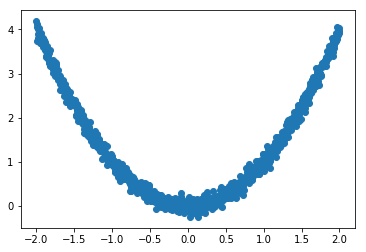

In [5]:
plt.scatter(x.numpy(), y.numpy())
plt.show()

In [6]:
# data loader
torch_dataset = torch.utils.data.TensorDataset(x, y)
loader = DataLoader(dataset=torch_dataset, batch_size=50, shuffle=True)

In [7]:
class BasicNet(nn.Module):
    def __init__(self, ip=1, hidden=25, op=1):
        super(BasicNet, self).__init__()
        self.hidden = nn.Linear(ip, hidden)
        self.op = nn.Linear(hidden, op)
        
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.op(x)
        return x

In [8]:
model_adam = BasicNet()
model_adamw = BasicNet()

In [9]:
optim_adam = optim.Adam(model_adam.parameters(), lr=0.001, betas=(0.85, 0.95), weight_decay=1e-3)
optim_adamw = AdamW.AdamW(model_adam.parameters(), lr=0.001, betas=(0.85, 0.95), weight_decay=1e-3)

In [10]:
loss = nn.MSELoss()

In [11]:
wd = 1e-3

In [12]:
def train(model, optim, epochs, losses, adamw=0):
    global wd
    for epoch in range(epochs):
        print('Epoch: ', epoch)
        for i, (ip, tgt) in enumerate(loader):
            output = model(ip)
            lss = loss(output, tgt)
            optim.zero_grad()
            lss.backward()
            #if adamw:
            #    wd = wd /(math.pow(20 * 50, 0.5))
            #    for group in optim.param_groups:
            #        group['weight_decay'] = wd
            optim.step()
            losses.append(lss.data.numpy())

In [13]:
epochs = 40

In [14]:
losses_adam = []
losses_adamw = []

In [15]:
train(model_adam, optim_adam, epochs, losses_adam)

Epoch:  0
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11
Epoch:  12
Epoch:  13
Epoch:  14
Epoch:  15
Epoch:  16
Epoch:  17
Epoch:  18
Epoch:  19
Epoch:  20
Epoch:  21
Epoch:  22
Epoch:  23
Epoch:  24
Epoch:  25
Epoch:  26
Epoch:  27
Epoch:  28
Epoch:  29
Epoch:  30
Epoch:  31
Epoch:  32
Epoch:  33
Epoch:  34
Epoch:  35
Epoch:  36
Epoch:  37
Epoch:  38
Epoch:  39


In [16]:
train(model_adamw, optim_adamw, epochs, losses_adamw, 1)

Epoch:  0
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11
Epoch:  12
Epoch:  13
Epoch:  14
Epoch:  15
Epoch:  16
Epoch:  17
Epoch:  18
Epoch:  19
Epoch:  20
Epoch:  21
Epoch:  22
Epoch:  23
Epoch:  24
Epoch:  25
Epoch:  26
Epoch:  27
Epoch:  28
Epoch:  29
Epoch:  30
Epoch:  31
Epoch:  32
Epoch:  33
Epoch:  34
Epoch:  35
Epoch:  36
Epoch:  37
Epoch:  38
Epoch:  39


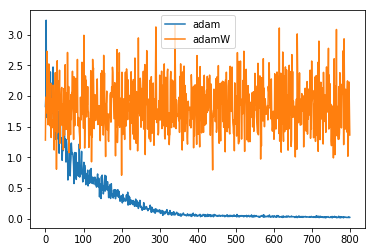

In [17]:
plt.plot(losses_adam, label = 'adam')
plt.plot(losses_adamw, label = 'adamW')
plt.legend(loc='best')